In [ ]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training Data : {}, {}".format(train_images.shape, train_labels.shape))
print("Test Data : {}, {}".format(test_images.shape, test_labels.shape))

Training Data : (60000, 28, 28), (60000,)
Test Data : (10000, 28, 28), (10000,)


In [3]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are [0 1 2 3 4 5 6 7 8 9]


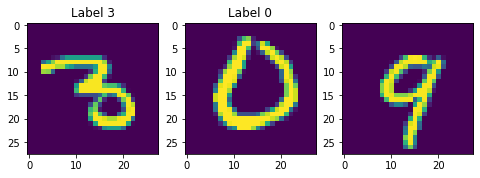

In [4]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt.imshow(train_images[30])
plt.title("Label {}".format(train_labels[30]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label {}".format(train_labels[2500]))

plt.subplot(1,3,3)
plt.imshow(test_images[12])

In [5]:
train_images = train_images/255.0
test_images = test_images/255.0

In [6]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]


print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)


In [7]:
# Reshape the data to two dimensinal array
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape)) #prints  x_train: (50000, 784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [8]:
y_val.shape

(10000,)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
# Encode Labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)


In [17]:
test_images.shape

(10000, 784)

In [11]:
import tensorflow.compat.v1 as tf2
tf2.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [12]:
X = tf2.placeholder(tf2.float32, [None, new_dimension])
Y = tf2.placeholder(tf2.float32, [None, no_labels])

In [13]:
X.shape

TensorShape([Dimension(None), Dimension(784)])

In [18]:
Y.shape

TensorShape([Dimension(None), Dimension(10)])

In [20]:
# Y_test = to_categorical(test_images, no_labels)

In [21]:
# Y_test.shape

(10000, 784, 10)

In [21]:
# first_weight = tf2.Variable(tf2.random_uniform([new_dimension, first_layer_neurons]))

In [14]:
# Create Model Architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
    # First Layer
    first_weight = tf2.Variable(tf2.random_uniform([new_dimension, first_layer_neurons]))
    first_bias = tf2.Variable(tf2.zeros([first_layer_neurons]))
    first_layer_output = tf2.nn.relu(tf2.add(tf2.matmul(x, first_weight), first_bias))
    
    #Second Layer
    second_weight = tf2.Variable(tf2.random_uniform([first_layer_neurons, second_layer_neurons]))
    second_bias = tf2.Variable(tf2.zeros([second_layer_neurons]))
    second_layer_output = tf2.nn.relu(tf2.add(tf2.matmul(first_layer_output, second_weight), second_bias))
    
    #Final Layer
    final_weight = tf2.Variable(tf2.random_uniform([second_layer_neurons, no_classes]))
    final_bias = tf2.Variable(tf2.zeros([no_classes]))
    logits = tf2.nn.relu(tf2.add(tf2.matmul(second_layer_output, final_weight), final_bias))
    
    return logits

In [20]:
logits = multilayer_perceptron(X, no_labels)

learning_rate = 0.01

#defining optimizer and loss function of the network

loss_op = tf2.reduce_mean(tf2.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf2.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)

#initialize the variables
init = tf2.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train)// batch_size

#train_model

with tf2.Session() as session:
    session.run(init)
    for epoch in range(epochs):
        average_cost = 0
        start, end = 0, batch_size
        
        for i in range(iteration):
            batch_x, batch_y = x_train[start: end], y_train[start: end]
#             print('batch_x',batch_x.shape)
#             print('batch_y',batch_y.shape)
            _, loss = session.run([train_op, loss_op], feed_dict = {X:batch_x, Y:batch_y})
            start += batch_size
            end += batch_size
            
            #Average Loss
            average_cost += loss/iteration
        print("Epoch================{}".format(epoch))
        
    #Evaluate_model
    prediction = tf2.nn.softmax(logits)
    ground_truth = tf2.equal(tf2.argmax(prediction, 1), tf2.argmax(Y, 1))
    accuracy = tf2.reduce_mean(tf2.cast(ground_truth, "float"))
    print("Accuracy: {}".format(accuracy.eval({X:test_images, Y:y_test})))

Epoch================0
Epoch================1
Epoch================2
Epoch================3
Epoch================4
Epoch================5
Epoch================6
Epoch================7
Epoch================8
Epoch================9
Epoch================10
Epoch================11
Epoch================12
Epoch================13
Epoch================14
Epoch================15
Epoch================16
Epoch================17
Epoch================18
Epoch================19
Accuracy: 0.9104999899864197


In [19]:
y_test.shape

(10000, 10)